In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [122]:
#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns


from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys                    # For data size

In [123]:
wh = pd.read_csv(r'C:\PythonTest\Capstonedatautf8nobadv3.csv')
wh.describe()


,business.leisure,days.booked.before.departure,month.of.travel,frequent.flyer.airline,ff.flag,origin.airport.code,service.class.code,birth_decade,gender.code,group.id,...,travelmonth,travelyear,group.size,group.band.num,trip.start.port.state.num,trip.start.port.region.num,trip.start.port.airport.size.num,pp.country.code,pp.country.region.code,pp.subregion.code
count,241842.000000,241842.000000,241842.000000,66929.000000,241842.000000,241842.000000,241842.000000,241842.000000,241842.000000,241842.000000,...,241842.000000,241842.000000,241842.000000,241842.000000,241842.000000,241842.000000,241791.000000,240682.000000,240682.000000,240682.000000
mean,0.120264,112.032203,201759.339474,2.260395,0.276747,1283.403896,0.314168,1969.268903,1.091977,92089.069533,...,6.346197,2017.529933,2.435201,1.781374,17.248083,6.828603,1.011460,756.272023,21.884777,33.583712
std,0.325271,90.669718,50.085126,3.235543,0.447391,297.666194,0.655218,19.818003,0.782414,53024.151841,...,3.746812,0.499113,3.600796,0.901928,19.718383,2.746582,0.107828,203.762120,23.311291,50.081323
min,0.000000,0.000000,201701.000000,1.000000,0.000000,988.000000,0.000000,1930.000000,0.000000,0.000000,...,1.000000,2017.000000,1.000000,0.000000,1.000000,1.000000,1.000000,4.000000,2.000000,15.000000
25%,0.000000,40.000000,201706.000000,1.000000,0.000000,1143.000000,0.000000,1950.000000,0.000000,46222.250000,...,3.000000,2017.000000,1.000000,1.000000,5.000000,5.000000,1.000000,840.000000,19.000000,21.000000
50%,0.000000,86.000000,201801.000000,1.000000,0.000000,1143.000000,0.000000,1970.000000,1.000000,92198.000000,...,6.000000,2018.000000,2.000000,2.000000,5.000000,9.000000,1.000000,840.000000,19.000000,21.000000
75%,0.000000,167.000000,201806.000000,3.000000,1.000000,1734.000000,0.000000,1980.000000,2.000000,138393.750000,...,10.000000,2018.000000,2.000000,2.000000,30.000000,9.000000,1.000000,840.000000,19.000000,21.000000
max,1.000000,908.000000,201901.000000,65.000000,1.000000,1734.000000,2.000000,2010.000000,2.000000,184596.000000,...,12.000000,2019.000000,60.000000,5.000000,99.000000,16.000000,3.000000,894.000000,150.000000,419.000000


In [157]:
print("Dimension of dataset: wh.shape")
wh.dtypes

Dimension of dataset: wh.shape


business.leisure                    float64
days.booked.before.departure        float64
month.of.travel                     float64
frequent.flyer.airline              float64
ff.flag                             float64
origin.airport                       object
origin.airport.code                 float64
service.class                        object
service.class.code                  float64
passport.country                     object
birth_decade                        float64
gender                               object
gender.code                         float64
group.id                            float64
fare.cost                            object
pax_key                             float64
trip_start_port                      object
trip.start.port.code                float64
fare.set                            float64
age.generation.appx                  object
age.generation.label                 object
service                              object
travelmonth                     

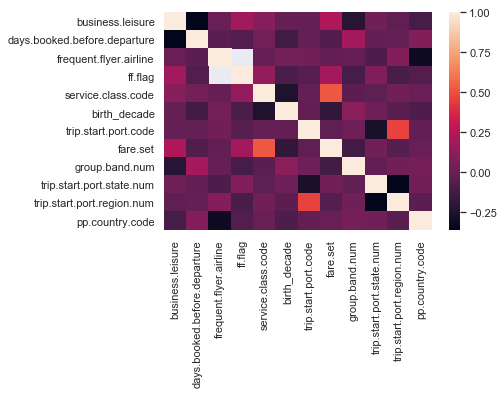

In [158]:
wh1 = wh[['business.leisure', 'days.booked.before.departure', 'frequent.flyer.airline', 'ff.flag', 
           'service.class.code', 'birth_decade',  
          'trip.start.port.code', 'fare.set', 'group.band.num', 
          'trip.start.port.state.num', 'trip.start.port.region.num',  
          'pp.country.code']] #Subsetting the data
cor = wh1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = False, robust = True) #Plot the correlation as heat map

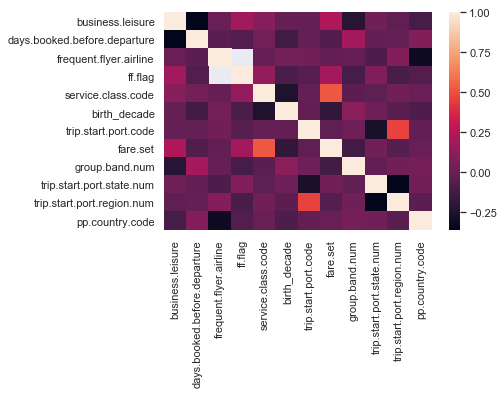

In [156]:
wh1 = wh[['business.leisure', 'days.booked.before.departure', 'frequent.flyer.airline', 'ff.flag', 
           'service.class.code', 'birth_decade',  
          'trip.start.port.code', 'fare.set', 'group.band.num', 
          'trip.start.port.state.num', 'trip.start.port.region.num',  
          'pp.country.code', 'age.generation.label']] #Subsetting the data
cor = wh1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = False, robust = True) #Plot the correlation as heat map

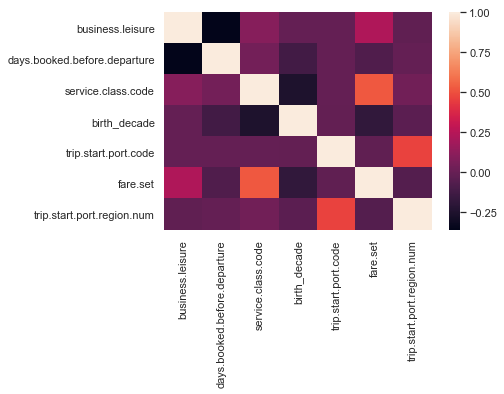

In [159]:
wh1 = wh[['business.leisure', 'days.booked.before.departure', 
           'service.class.code', 'birth_decade',  
          'trip.start.port.code', 'fare.set',
          'trip.start.port.region.num'
         ]] #Subsetting the data
cor = wh1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = False, robust = True) #Plot the correlation as heat map

In [199]:
wh2 = wh[[
           'service.class.code', 'birth_decade',  'travelseason',
          'trip.start.port.code', 'fare.set', 'age.generation.appx'
        ]] #Subsetting the data



,service.class.code,birth_decade,travelseason,trip.start.port.code,fare.set,age.generation.appx
0,0.0,1990.0,Summer,232.0,1.0,Millennial
1,0.0,1940.0,Summer,232.0,1.0,Boomer
2,0.0,2010.0,Summer,232.0,1.0,Gen Z
3,0.0,1940.0,Summer,232.0,1.0,Boomer
4,0.0,2010.0,Summer,232.0,1.0,Gen Z


In [196]:
wh1.head()

,business.leisure,days.booked.before.departure,service.class.code,birth_decade,trip.start.port.code,fare.set,trip.start.port.region.num
0,0.0,61.0,0.0,1990.0,232.0,1.0,5.0
1,0.0,88.0,0.0,1940.0,232.0,1.0,5.0
2,0.0,135.0,0.0,2010.0,232.0,1.0,5.0
3,0.0,88.0,0.0,1940.0,232.0,1.0,5.0
4,0.0,135.0,0.0,2010.0,232.0,1.0,5.0


In [163]:
np.any(np.isnan(wh1))


True

In [165]:
np.all(np.isfinite(wh1))


False

In [166]:
#Scaling of data
ss = StandardScaler()
ss.fit_transform(wh1)

array([[-0.36973674, -0.5628374 , -0.47948727, ..., -2.36035288,
        -1.49274771, -0.66577552],
       [-0.36973674, -0.26505269, -0.47948727, ..., -2.36035288,
        -1.49274771, -0.66577552],
       [-0.36973674,  0.25331329, -0.47948727, ..., -2.36035288,
        -1.49274771, -0.66577552],
       ...,
       [-0.36973674, -0.84959305, -0.47948727, ..., -1.78521568,
         0.19572161, -1.75804463],
       [-0.36973674,  0.17610985, -0.47948727, ..., -1.78521568,
         0.19572161, -1.75804463],
       [-0.36973674, -0.8054768 , -0.47948727, ..., -1.78521568,
         0.19572161, -1.75804463]])

In [167]:
print(ss.fit(wh1))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [168]:
wh1.head()

,business.leisure,days.booked.before.departure,service.class.code,birth_decade,trip.start.port.code,fare.set,trip.start.port.region.num
0,0.0,61.0,0.0,1990.0,232.0,1.0,5.0
1,0.0,88.0,0.0,1940.0,232.0,1.0,5.0
2,0.0,135.0,0.0,2010.0,232.0,1.0,5.0
3,0.0,88.0,0.0,1940.0,232.0,1.0,5.0
4,0.0,135.0,0.0,2010.0,232.0,1.0,5.0


In [170]:
wh1.describe()

,business.leisure,days.booked.before.departure,service.class.code,birth_decade,trip.start.port.code,fare.set,trip.start.port.region.num
count,241842.000000,241842.000000,241842.000000,241842.000000,241791.000000,241842.000000,241842.000000
mean,0.120264,112.032203,0.314168,1969.268903,1200.539822,2.768167,6.828603
std,0.325271,90.669718,0.655218,19.818003,410.337723,1.184507,2.746582
min,0.000000,0.000000,0.000000,1930.000000,111.000000,1.000000,1.000000
25%,0.000000,40.000000,0.000000,1950.000000,988.000000,2.000000,5.000000
50%,0.000000,86.000000,0.000000,1970.000000,1143.000000,3.000000,9.000000
75%,0.000000,167.000000,0.000000,1980.000000,1536.000000,4.000000,9.000000
max,1.000000,908.000000,2.000000,2010.000000,2060.000000,5.000000,16.000000


In [171]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(wh1, 2)
kmeans = pd.DataFrame(clust_labels)
wh1.insert((wh1.shape[1]),'kmeans',kmeans)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

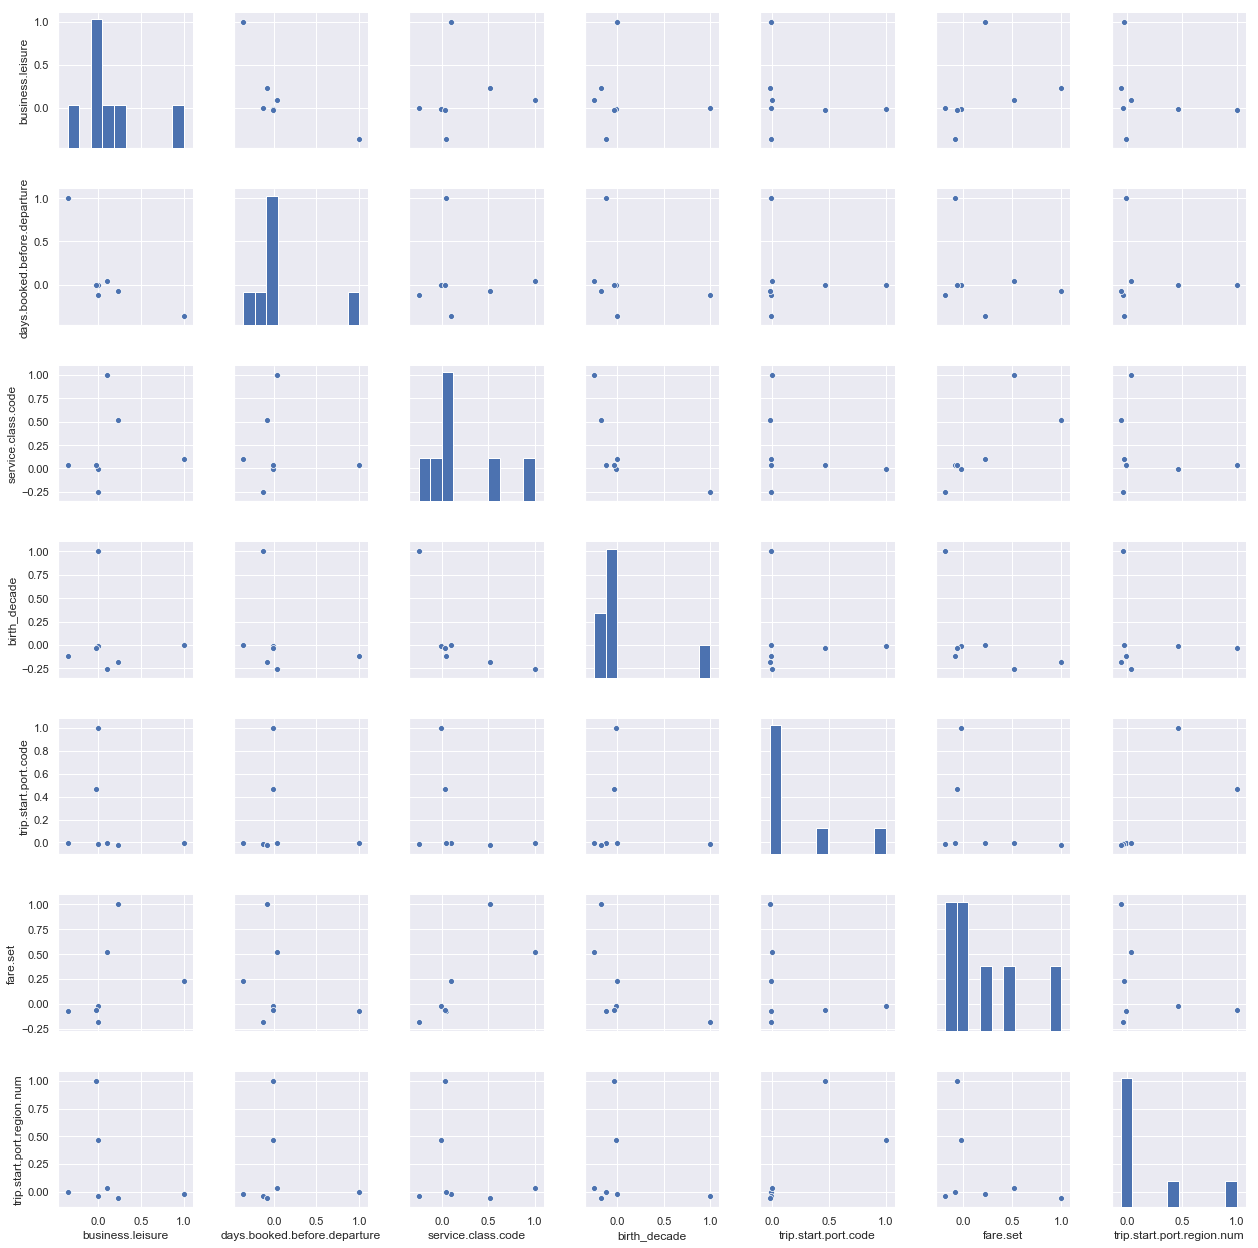

In [193]:

wh1 = wh[['business.leisure', 'days.booked.before.departure', 
           'service.class.code', 'birth_decade',  
          'trip.start.port.code', 'fare.set',
          'trip.start.port.region.num'
         ]] #Subsetting the data
cor = wh1.corr() #Calculate the correlation of the above variables
sns.pairplot(cor)


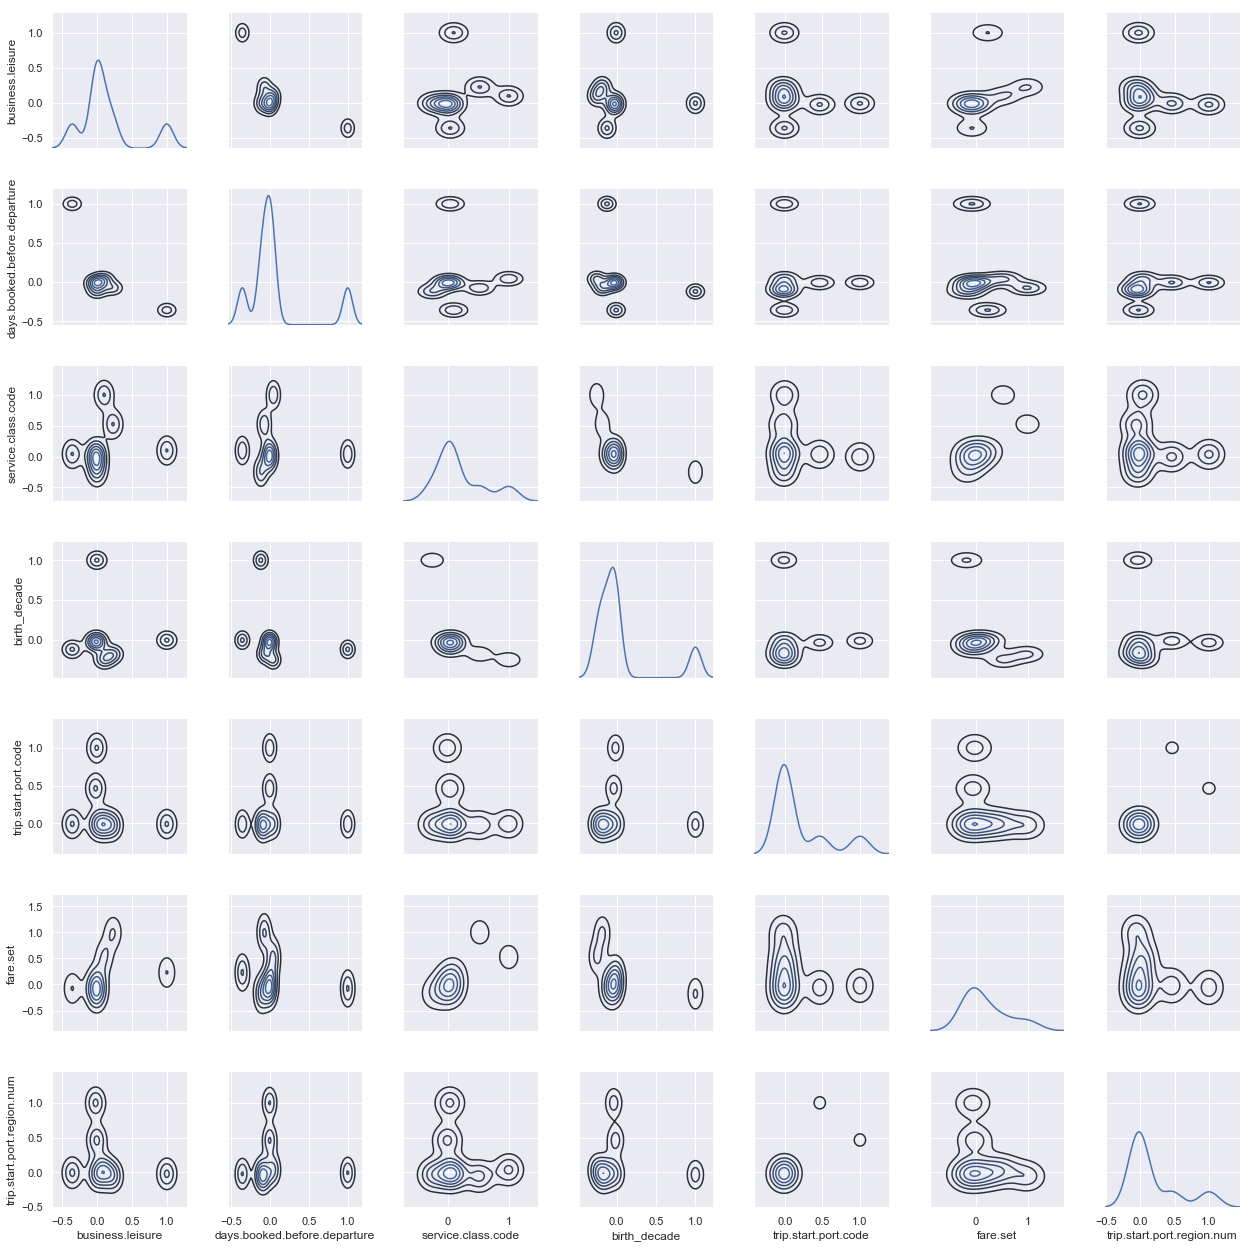

In [194]:
wh1 = wh[['business.leisure', 'days.booked.before.departure', 
           'service.class.code', 'birth_decade',  
          'trip.start.port.code', 'fare.set',
          'trip.start.port.region.num'
         ]] #Subsetting the data
cor = wh1.corr() #Calculate the correlation of the above variables

g = sns.PairGrid(cor)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);